In [1]:
%load_ext autoreload

%autoreload 2

from glob import glob
from os.path import join
import os
import pickle

import scipy.linalg
import scipy.stats
import matplotlib
matplotlib.rcParams["figure.dpi"] = 144
matplotlib.rcParams["savefig.dpi"] = 144
import matplotlib.pyplot as plt
import numpy as np

from astropy.table import Table, Column
import astropy.units as u

import emcee

import kepler
import threebody

import minuit_wrap
%matplotlib inline

import logging
logger = logging.getLogger()
#logger.setLevel(logging.DEBUG)
logger.setLevel(logging.INFO)
logging.debug("test")

In [4]:


fitter_params = dict(files="tuned2_aligned_pulses_1400_nosun",
                     tzrmjd_middle='auto',
                     parfile="0337_tempo2_px_optical_dmcorr.par",
                     fit_pos=True,
                     fit_pm=True,
                     fit_px=True,
                     efac=1,
                     t2_astrometry=True,
                     kopeikin=False,
                     ppn_mode='heavysimple',
                     linear_jumps=True,
                     linear_dm=True,
                     fdn_range=(1,5),
                     priors=('dbeta','dgamma'),
                     toa_mode="pipeline",
                     dmx_span=180,
                     variable_ipm=True)
F = threebody.Fitter(**fitter_params)
new_params = fitter_params.copy()
new_params["parfile"] = "0337_de430.par"
F2 = threebody.Fitter(**new_params)


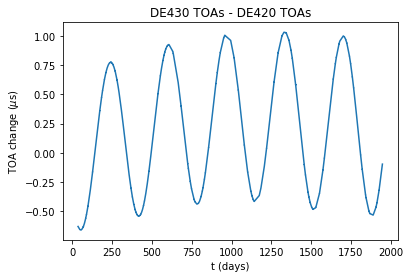

In [8]:
plt.plot(F.mjds, (F2.mjds-F.mjds)*86400*1e6)
plt.xlabel("t (days)")
plt.ylabel("TOA change ($\mu$s)")
plt.title("DE430 TOAs - DE420 TOAs")
plt.savefig("ephemeris-change.pdf")